In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


##PART -A

In [2]:
STUDENT_ID = "PES2UG23CS345"

# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY

In [3]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES2UG23CS345
Polynomial Type: QUADRATIC: y = 1.06x² + 6.32x + 9.97
Noise Level: ε ~ N(0, 2.10)
Architecture: Input(1) → Hidden(32) → Hidden(72) → Output(1)
Learning Rate: 0.005
Architecture Type: Narrow-to-Wide Architecture


# DATASET GENERATION - DO NOT MODIFY

In [4]:
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients

    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


# ACTIVATION FUNCTIONS- TODO: IMPLEMENT

In [5]:
def relu(z):
    # ReLU activation: max(0, z)
    return np.maximum(0, z)


def relu_derivative(z):
    # Derivative of ReLU: 1 where z>0 else 0
    dz = np.zeros_like(z)
    dz[z > 0] = 1.0
    return dz

# (Optional) Additional activation for experimentation

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    t = np.tanh(z)
    return 1 - t**2

# LOSS FUNCTION- TODO: IMPLEMENT

In [6]:
def mse_loss(y_true, y_pred):
    # Mean Squared Error
    # y_true, y_pred shape: (batch, 1)
    return np.mean((y_true - y_pred) ** 2)

# WEIGHT INITIALIZATION - TODO: IMPLEMENT XAVIER INITIALIZATION
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.  
- If weights are **too small** → activations and gradients vanish.  
- If weights are **too large** → activations and gradients explode.  

#**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:  
- **fan_in** = number of input units to a layer  
- **fan_out** = number of output units from a layer  

The variance of weights is:

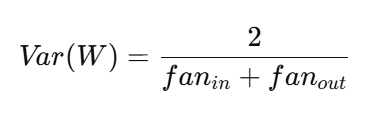


##Two common forms:  

#**Normal distribution:**  
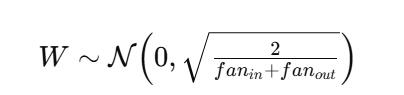

#**Uniform distribution:**  
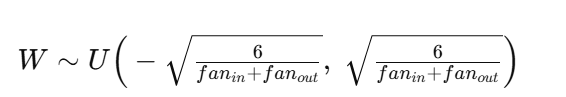

Biases are initialized to **0**.

---

### In This Assignment
- **W1 (input → hidden1):** `fan_in = input_dim`, `fan_out = hidden1`  
- **W2 (hidden1 → hidden2):** `fan_in = hidden1`, `fan_out = hidden2`  
- **W3 (hidden2 → output):** `fan_in = hidden2`, `fan_out = output_dim`  

Your task: compute the correct `xavier_std` for each layer, sample weights from a normal distribution with that std, and set biases = 0.



In [7]:
def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    Xavier initialization: weights ~ N(0, sqrt(2/(fan_in + fan_out)))
    Biases initialized to zeros.
    Returns W1, b1, W2, b2, W3, b3
    """
    np.random.seed(assignment["student_seed"])

    def xavier(fan_in, fan_out):
        std = np.sqrt(2.0 / (fan_in + fan_out))
        return std

    # Layer 1
    std1 = xavier(input_dim, hidden1)
    W1 = np.random.normal(0, std1, (input_dim, hidden1))
    b1 = np.zeros((1, hidden1))

    # Layer 2
    std2 = xavier(hidden1, hidden2)
    W2 = np.random.normal(0, std2, (hidden1, hidden2))
    b2 = np.zeros((1, hidden2))

    # Layer 3 (output)
    std3 = xavier(hidden2, output_dim)
    W3 = np.random.normal(0, std3, (hidden2, output_dim))
    b3 = np.zeros((1, output_dim))

    return W1, b1, W2, b2, W3, b3

# FORWARD PROPAGATION - TODO: IMPLEMENT

In [8]:
def forward_pass(X, W1, b1, W2, b2, W3, b3, activation="relu"):
    """
    Forward pass: Input → Hidden1(act) → Hidden2(act) → Output(linear)
    Returns: z1, a1, z2, a2, z3 (output)
    """
    act = relu if activation == "relu" else tanh

    z1 = X @ W1 + b1  # (batch, hidden1)
    a1 = act(z1)

    z2 = a1 @ W2 + b2  # (batch, hidden2)
    a2 = act(z2)

    z3 = a2 @ W3 + b3  # (batch, 1) linear output
    return z1, a1, z2, a2, z3

# BACKWARD PROPAGATION - TODO:IMPLEMENT

In [9]:
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3, activation="relu"):
    """Compute gradients for all parameters.
    X: (batch, 1)
    Y_true, Y_pred: (batch,1)
    Returns gradients.
    """
    m = X.shape[0]

    # Choose derivative
    act_deriv = relu_derivative if activation == "relu" else tanh_derivative

    # dLoss/dY_pred for MSE: (2/m)*(Y_pred - Y_true)
    dY_pred = (2.0 / m) * (Y_pred - Y_true)  # (batch,1)

    # Output layer
    dW3 = a2.T @ dY_pred            # (hidden2,1)
    db3 = np.sum(dY_pred, axis=0, keepdims=True)  # (1,1)

    # Backprop into a2
    da2 = dY_pred @ W3.T            # (batch, hidden2)
    dz2 = da2 * act_deriv(z2)       # (batch, hidden2)
    dW2 = a1.T @ dz2                # (hidden1, hidden2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # Backprop into a1
    da1 = dz2 @ W2.T                # (batch, hidden1)
    dz1 = da1 * act_deriv(z1)       # (batch, hidden1)
    dW1 = X.T @ dz1                 # (1, hidden1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

# TRAINING FUNCTION - TODO:  COMPLETE IMPLEMENTATION

In [10]:
def train_neural_network(X_train, Y_train, X_test, Y_test,
                          epochs=200,
                          patience=10,
                          batch_size=32,
                          learning_rate=learning_rate,
                          optimizer="adam",
                          activation="relu",
                          beta1=0.9,
                          beta2=0.999,
                          eps=1e-8):
    """Train network with mini-batch gradient descent + optional Adam optimizer.
    Returns best weights and histories.
    """
    n_samples = X_train.shape[0]

    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)

    # Adam moment terms
    mW1 = np.zeros_like(W1); vW1 = np.zeros_like(W1)
    mW2 = np.zeros_like(W2); vW2 = np.zeros_like(W2)
    mW3 = np.zeros_like(W3); vW3 = np.zeros_like(W3)
    mb1 = np.zeros_like(b1); vb1 = np.zeros_like(b1)
    mb2 = np.zeros_like(b2); vb2 = np.zeros_like(b2)
    mb3 = np.zeros_like(b3); vb3 = np.zeros_like(b3)

    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0

    train_losses = []
    test_losses = []

    # Accuracy metrics (for regression we'll approximate using relative tolerance)
    train_acc_hist = []
    test_acc_hist = []

    def regression_accuracy(y_true, y_pred, tol=0.10):
        # Percentage within relative error tolerance
        denom = np.maximum(np.abs(y_true), 1e-8)
        rel_err = np.abs(y_true - y_pred) / denom
        return np.mean(rel_err < tol)

    print("Starting training...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1 | Activation: {activation} | Optimizer: {optimizer}")
    print(f"LR={learning_rate} | Batch Size={batch_size} | Epochs={epochs} | Patience={patience}")
    print("-" * 70)

    global_step = 0

    for epoch in range(epochs):
        # Shuffle indices
        idx = np.random.permutation(n_samples)
        X_train_shuf = X_train[idx]
        Y_train_shuf = Y_train[idx]

        epoch_loss = 0.0
        n_batches = int(np.ceil(n_samples / batch_size))

        for b in range(n_batches):
            start = b * batch_size
            end = min(start + batch_size, n_samples)
            X_batch = X_train_shuf[start:end]
            Y_batch = Y_train_shuf[start:end]

            z1, a1, z2, a2, Y_pred_batch = forward_pass(X_batch, W1, b1, W2, b2, W3, b3, activation=activation)
            batch_loss = mse_loss(Y_batch, Y_pred_batch)
            epoch_loss += batch_loss * (end - start)

            dW1, db1_g, dW2, db2_g, dW3, db3_g = backward_pass(X_batch, Y_batch, z1, a1, z2, a2, Y_pred_batch, W2, W3, activation=activation)

            if optimizer == "adam":
                global_step += 1
                # Update moments
                mW1 = beta1*mW1 + (1-beta1)*dW1; vW1 = beta2*vW1 + (1-beta2)*(dW1**2)
                mW2 = beta1*mW2 + (1-beta1)*dW2; vW2 = beta2*vW2 + (1-beta2)*(dW2**2)
                mW3 = beta1*mW3 + (1-beta1)*dW3; vW3 = beta2*vW3 + (1-beta2)*(dW3**2)
                mb1 = beta1*mb1 + (1-beta1)*db1_g; vb1 = beta2*vb1 + (1-beta2)*(db1_g**2)
                mb2 = beta1*mb2 + (1-beta1)*db2_g; vb2 = beta2*vb2 + (1-beta2)*(db2_g**2)
                mb3 = beta1*mb3 + (1-beta1)*db3_g; vb3 = beta2*vb3 + (1-beta2)*(db3_g**2)

                # Bias-correct
                def bc(m, v):
                    m_hat = m / (1 - beta1**global_step)
                    v_hat = v / (1 - beta2**global_step)
                    return m_hat, v_hat

                mW1h, vW1h = bc(mW1, vW1)
                mW2h, vW2h = bc(mW2, vW2)
                mW3h, vW3h = bc(mW3, vW3)
                mb1h, vb1h = bc(mb1, vb1)
                mb2h, vb2h = bc(mb2, vb2)
                mb3h, vb3h = bc(mb3, vb3)

                W1 -= learning_rate * mW1h / (np.sqrt(vW1h) + eps)
                W2 -= learning_rate * mW2h / (np.sqrt(vW2h) + eps)
                W3 -= learning_rate * mW3h / (np.sqrt(vW3h) + eps)
                b1 -= learning_rate * mb1h / (np.sqrt(vb1h) + eps)
                b2 -= learning_rate * mb2h / (np.sqrt(vb2h) + eps)
                b3 -= learning_rate * mb3h / (np.sqrt(vb3h) + eps)
            else:  # vanilla SGD
                W1 -= learning_rate * dW1
                W2 -= learning_rate * dW2
                W3 -= learning_rate * dW3
                b1 -= learning_rate * db1_g
                b2 -= learning_rate * db2_g
                b3 -= learning_rate * db3_g

        # Average epoch loss
        train_loss = epoch_loss / n_samples
        z1_t, a1_t, z2_t, a2_t, Y_pred_train_full = forward_pass(X_train, W1, b1, W2, b2, W3, b3, activation=activation)
        z1_v, a1_v, z2_v, a2_v, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3, activation=activation)
        test_loss = mse_loss(Y_test, Y_pred_test)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # Pseudo accuracy
        train_acc = regression_accuracy(Y_train, Y_pred_train_full)
        test_acc = regression_accuracy(Y_test, Y_pred_test)
        train_acc_hist.append(train_acc)
        test_acc_hist.append(test_acc)

        if (epoch + 1) % max(1, epochs // 10) == 0:
            print(f"Epoch {epoch+1:4d} | Train Loss {train_loss:.6f} | Test Loss {test_loss:.6f} | TrainAcc {train_acc:.3f} | TestAcc {test_acc:.3f}")

        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1} | Best Test Loss {best_test_loss:.6f}")
                break

    history = {
        "train_loss": train_losses,
        "test_loss": test_losses,
        "train_acc": train_acc_hist,
        "test_acc": test_acc_hist,
    }
    return best_weights, history

# EXECUTE TRAINING

In [11]:
print("Training Baseline Neural Network (Part A)...")
BASELINE_CONFIG = {
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 10,
    "optimizer": "adam",
    "activation": "relu",
    "patience": 10,
}
weights, history = train_neural_network(
    X_train_scaled, Y_train_scaled,
    X_test_scaled, Y_test_scaled,
    epochs=BASELINE_CONFIG["epochs"],
    patience=BASELINE_CONFIG["patience"],
    batch_size=BASELINE_CONFIG["batch_size"],
    learning_rate=BASELINE_CONFIG["learning_rate"],
    optimizer=BASELINE_CONFIG["optimizer"],
    activation=BASELINE_CONFIG["activation"],
)
train_losses = history["train_loss"]
test_losses = history["test_loss"]

Training Baseline Neural Network (Part A)...
Starting training...
Architecture: 1 → 32 → 72 → 1 | Activation: relu | Optimizer: adam
LR=0.001 | Batch Size=32 | Epochs=10 | Patience=10
----------------------------------------------------------------------
Epoch    1 | Train Loss 0.024309 | Test Loss 0.000013 | TrainAcc 0.991 | TestAcc 0.991
Epoch    2 | Train Loss 0.000014 | Test Loss 0.000017 | TrainAcc 0.985 | TestAcc 0.985
Epoch    3 | Train Loss 0.000028 | Test Loss 0.000003 | TrainAcc 0.997 | TestAcc 0.996
Epoch    4 | Train Loss 0.000030 | Test Loss 0.000465 | TrainAcc 0.942 | TestAcc 0.944
Epoch    5 | Train Loss 0.000036 | Test Loss 0.000017 | TrainAcc 0.985 | TestAcc 0.986
Epoch    6 | Train Loss 0.000029 | Test Loss 0.000186 | TrainAcc 0.943 | TestAcc 0.946
Epoch    7 | Train Loss 0.000024 | Test Loss 0.000006 | TrainAcc 0.993 | TestAcc 0.994
Epoch    8 | Train Loss 0.000031 | Test Loss 0.000015 | TrainAcc 0.976 | TestAcc 0.976
Epoch    9 | Train Loss 0.000046 | Test Loss 0.00

In [12]:
# Part B: Hyperparameter Exploration
print("\nRunning Hyperparameter Experiments (Part B)...")
experiments = [
    {"name": "Exp1_HigherLR", "learning_rate": 0.005, "batch_size": 32, "epochs": 20, "optimizer": "adam", "activation": "relu"},
    {"name": "Exp2_LargerBatch", "learning_rate": 0.001, "batch_size": 128, "epochs": 20, "optimizer": "adam", "activation": "relu"},
    {"name": "Exp3_MoreEpochs", "learning_rate": 0.001, "batch_size": 32, "epochs": 40, "optimizer": "adam", "activation": "relu"},
    {"name": "Exp4_TanhActivation", "learning_rate": 0.001, "batch_size": 32, "epochs": 20, "optimizer": "adam", "activation": "tanh"},
]

results_rows = []

for cfg in experiments:
    print(f"\n--- Running {cfg['name']} ---")
    wts, hist = train_neural_network(
        X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
        epochs=cfg["epochs"], patience=10, batch_size=cfg["batch_size"],
        learning_rate=cfg["learning_rate"], optimizer=cfg["optimizer"], activation=cfg["activation"],
    )
    final_train_loss = hist["train_loss"][-1]
    final_test_loss = hist["test_loss"][-1]
    final_train_acc = hist["train_acc"][-1]
    final_test_acc = hist["test_acc"][-1]
    # Placeholder validation metrics (using test as proxy since no separate val split provided)
    val_loss = final_test_loss
    val_acc = final_test_acc
    results_rows.append([
        cfg['name'], cfg['learning_rate'], cfg['batch_size'], cfg['epochs'], cfg['optimizer'], cfg['activation'],
        f"{final_train_acc:.3f}", f"{val_acc:.3f}", f"{final_test_acc:.3f}",
        f"{final_train_loss:.6f}", f"{val_loss:.6f}", f"{final_test_loss:.6f}",
        "Observation TBD"
    ])

results_df = pd.DataFrame(results_rows, columns=[
    "Experiment", "Learning Rate", "Batch Size", "Epochs", "Optimizer", "Activation", "Training Accuracy",
    "Validation Accuracy", "Test Accuracy", "Training Loss", "Validation Loss", "Test Loss", "Observations"
])

print("\nExperiment Results Summary:")
print(results_df)



Running Hyperparameter Experiments (Part B)...

--- Running Exp1_HigherLR ---
Starting training...
Architecture: 1 → 32 → 72 → 1 | Activation: relu | Optimizer: adam
LR=0.005 | Batch Size=32 | Epochs=20 | Patience=10
----------------------------------------------------------------------
Epoch    2 | Train Loss 0.000251 | Test Loss 0.000017 | TrainAcc 0.984 | TestAcc 0.984
Epoch    4 | Train Loss 0.000193 | Test Loss 0.002934 | TrainAcc 0.734 | TestAcc 0.734
Epoch    6 | Train Loss 0.000089 | Test Loss 0.000036 | TrainAcc 0.986 | TestAcc 0.986
Epoch    8 | Train Loss 0.000111 | Test Loss 0.000120 | TrainAcc 0.951 | TestAcc 0.953
Epoch   10 | Train Loss 0.000104 | Test Loss 0.000027 | TrainAcc 0.985 | TestAcc 0.985
Epoch   12 | Train Loss 0.000089 | Test Loss 0.000044 | TrainAcc 0.972 | TestAcc 0.974
Epoch   14 | Train Loss 0.000074 | Test Loss 0.000072 | TrainAcc 0.977 | TestAcc 0.978
Epoch   16 | Train Loss 0.000075 | Test Loss 0.000039 | TrainAcc 0.972 | TestAcc 0.973
Epoch   18 | Tr

# RESULTS VISUALIZATION

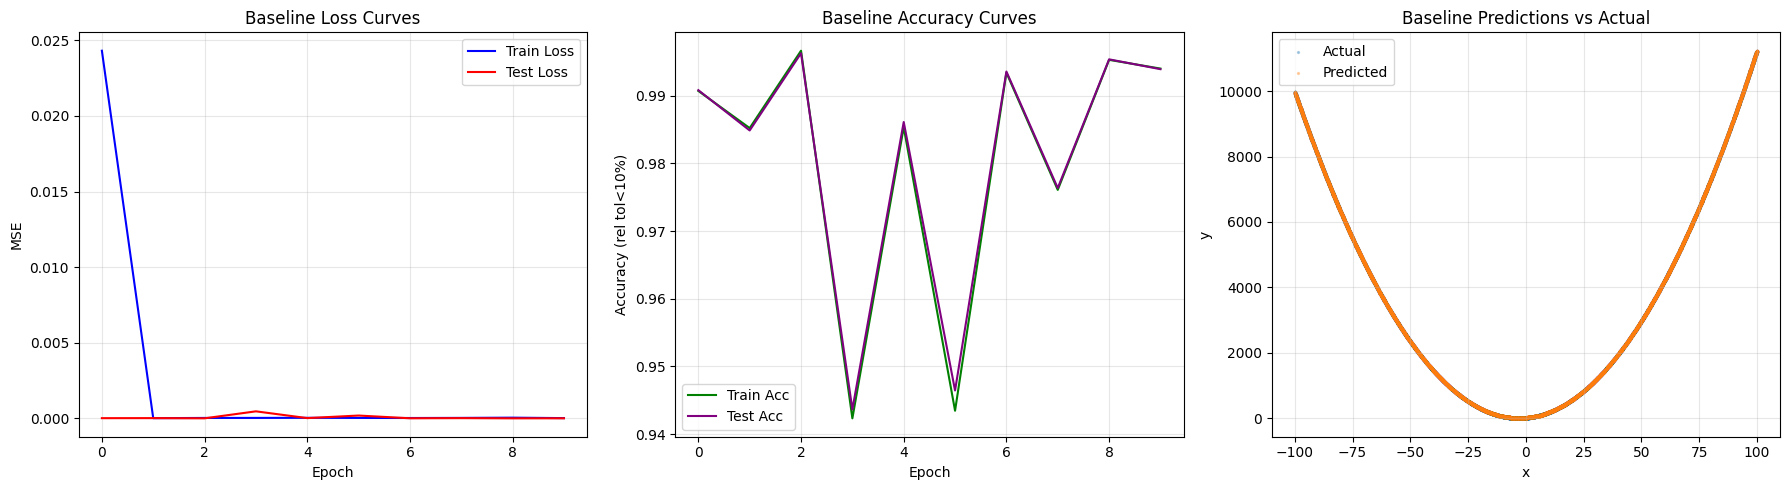

,Experiment,Learning Rate,Batch Size,Epochs,Optimizer,Activation,Training Accuracy,Validation Accuracy,Test Accuracy,Training Loss,Validation Loss,Test Loss,Observations
0,Exp1_HigherLR,0.005,32,20,adam,relu,0.987,0.987,0.987,0.000081,0.000022,0.000022,Observation TBD
1,Exp2_LargerBatch,0.001,128,20,adam,relu,0.973,0.975,0.975,0.000006,0.000030,0.000030,Observation TBD
2,Exp3_MoreEpochs,0.001,32,40,adam,relu,0.988,0.988,0.988,0.000034,0.000006,0.000006,Observation TBD
3,Exp4_TanhActivation,0.001,32,20,adam,tanh,0.944,0.945,0.945,0.000042,0.000162,0.000162,Observation TBD


In [13]:
# Plot training progress (Baseline)
plt.figure(figsize=(18, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(test_losses, label='Test Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Baseline Loss Curves')
plt.legend(); plt.grid(alpha=0.3)

# Accuracy curves (pseudo)
if 'history' in globals():
    plt.subplot(1, 3, 2)
    plt.plot(history['train_acc'], label='Train Acc', color='green')
    plt.plot(history['test_acc'], label='Test Acc', color='purple')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (rel tol<10%)')
    plt.title('Baseline Accuracy Curves')
    plt.legend(); plt.grid(alpha=0.3)

# Predictions vs Actual
W1, b1, W2, b2, W3, b3 = weights
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)

Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)

plt.subplot(1, 3, 3)
plt.scatter(X_test_orig, Y_test_orig, s=2, alpha=0.3, label='Actual')
plt.scatter(X_test_orig, Y_pred_orig, s=2, alpha=0.3, label='Predicted')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Baseline Predictions vs Actual')
plt.legend(); plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Show experiment table if exists
if 'results_df' in globals():
    display(results_df)


SPECIFIC PREDICTION TEST

In [14]:

x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")




PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 9,202.94
Ground Truth (formula):    9,201.77
Absolute Error:            1.16
Relative Error:            0.013%


# PERFORMANCE METRICS

In [15]:
# Final performance metrics (Baseline)
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

# R2 score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

baseline_train_acc = history['train_acc'][-1] if 'history' in globals() else None
baseline_test_acc = history['test_acc'][-1] if 'history' in globals() else None

print("\n" + "="*70)
print("BASELINE PERFORMANCE SUMMARY")
print("="*70)
print(f"Final Train Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:  {final_test_loss:.6f}")
print(f"R² Score:         {r2_score:.4f}")
if baseline_train_acc is not None:
    print(f"Final Train Acc (tol10%): {baseline_train_acc:.3f}")
    print(f"Final Test  Acc (tol10%): {baseline_test_acc:.3f}")
print(f"Total Epochs Run: {len(train_losses)}")
print("="*70)


BASELINE PERFORMANCE SUMMARY
Final Train Loss: 0.000017
Final Test Loss:  0.000005
R² Score:         1.0000
Final Train Acc (tol10%): 0.994
Final Test  Acc (tol10%): 0.994
Total Epochs Run: 10
